In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Reading the data

In [3]:
filename = 'FuelConsumptionCO2.csv'
df = pd.read_csv(filename)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


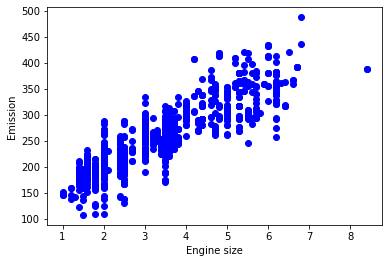

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Creating train and test dataset

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Polynomial Regression using PolynomialFeatures() in Scikit-learn library

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  5.6 , 31.36]])

In [41]:
clf = linear_model.LinearRegression()
y_train_ = clf.fit(X_train_poly, y_train)

# the coefficients
print('Coefficients: ' + str(clf.coef_))
print('Intercept: ' + str(clf.intercept_))

Coefficients: [[ 0.         47.42976379 -1.12705382]]
Intercept: [112.92021963]


Text(0, 0.5, 'Emission')

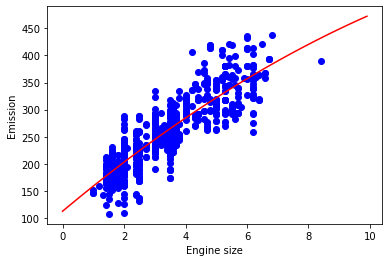

In [42]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

In [62]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(X_test)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, test_y_))


Mean absolute error: 23.92
Residual sum of squares (MSE): 960.87
R2-score: 0.77


C:\Users\angel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [63]:
poly2 = PolynomialFeatures(degree=3)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2

array([[  1.   ,   1.4  ,   1.96 ,   2.744],
       [  1.   ,   4.4  ,  19.36 ,  85.184],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       ...,
       [  1.   ,   4.4  ,  19.36 ,  85.184],
       [  1.   ,   1.8  ,   3.24 ,   5.832],
       [  1.   ,   5.6  ,  31.36 , 175.616]])

In [64]:
clf2 = linear_model.LinearRegression()
y_train_2 = clf2.fit(X_train_poly2, y_train)

# the coefficients
print('Coefficients: ' + str(clf2.coef_))
print('Intercept: ' + str(clf2.intercept_))

Coefficients: [[ 0.         29.92154206  3.7724906  -0.41363227]]
Intercept: [131.29858492]


Text(0, 0.5, 'Emission')

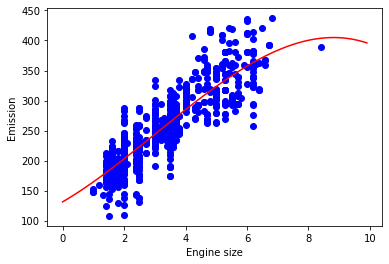

In [65]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
yy2 = clf2.intercept_[0] + clf2.coef_[0][1]*XX + clf2.coef_[0][2]*np.power(XX, 2) + clf2.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy2, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [66]:
from sklearn.metrics import r2_score

test_x_poly2 = poly2.transform(X_test)
test_y_2 = clf2.predict(test_x_poly2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_2 ) )

Mean absolute error: 23.82
Residual sum of squares (MSE): 950.52
R2-score: 0.77


C:\Users\angel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
